<a href="https://colab.research.google.com/github/maheshkumar30/Intellipaat-DataScience/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ensemble Learning : It is a ML Technique where multiple models (weak or stronger) are combined to make a single model

One model = one openion

Many models together = Smarter Decision

Types of Ensemple Learning :    

1. Bagging => Models are trained independently

            Example -> Random Forest

2. Boosting => models are trained one after other, each new model focus about the mistakes of the previous model

            First model makes the prediction

            Some pointed are predicted wrong

            Second model give more attention to the wrong points

            Third model will focus more

            Combining all models -> strong learner

            3 Boosting techniques -> AdaBoost, Gradient Boosting, XGBoost

#AdaBoost(Adaptive Boosting)

In [ ]:
#weight = importance
#What problem adaboost is solving:
#"One weak model is not good enough"
#"Let's combine many weak models and mae a strong one"
#ADABOOST IDEA:
#Focus more on the data points that are hard to predict

In [ ]:
#Adaboost trains models sequentially.
#each next model focus more on the mistakes of the previous mode

In [ ]:
#Step by step of adaboost:
#1. Start with equal importance(weight)
    # if i have n data points -> intially all datapoints are equally important
#2. Train the first learner :
    #using these weights we will train a decision
    #the model will try to minimise the weighted error
    #Some points are:
      #correctly classifie
      #misclassified
#3. Measure how bad the model is:
    #compute error = total weight of misclassified points
    #model makes mistake => error high
    #model is right => error is low
#4. Good Model -> higher weight
#  bad model -> lower weight
#5. Updating the datapoint weights:
#   Misclassified points -> increase the weight
#   correctly classified points -> decreae the weight
#6. Training the next weak learner

In [ ]:
#2. Gradient Boosting
#Focus on the residuals (error)
#residuals = actual - predicted
#"What mistake did I make?"
#"let me predict on thos mistakes now"


In [ ]:
#workflow
#1. First model predict
#2. Calculate error
#3. Second model learn those residuals
#4. Add prediction to previous model
#5. repeat

#eXtream Gradient Boosting(XGBoost)

In [ ]:
# => optimised ,regularized and fast version of Gradient Boosting
#Why extreme
# => Speed(Parallel Processing)
#    Regularization(Controls overfitting)
#    Handle the missing values automotically

What kind of model is XGBoost:

      Not one tree, not random tree => many small decision trees added on by one

Each Tree :    

      Is week
      Makes small correction
      improves the model gradually

What does the first Tree

      XGBoost starts with very dump prediction
      First prediction is the average of target values

What is Loss Function / error :    

        "How wrong is my prediction"
        Actual - predicted

What does the second tree learn:

      Take input feature, target = Residuals
      "When should I increase prediction
      When should I decrease prediction"

Learning Rate:

      Learning rate controls => how much correcetion to apply

      why learning rate:
          Prevent overfitting
          make learning slow and stable

      "XGBoost Learns slowly but learns well"

Regularization:

      "Is the split necessary"

      XGBoost adds penalities

      based on penalities -> if the improvement is worth it -> split

Objective =>

        Loss + regularization
        Meaning:
            Be accurate
            But don't be too complex

In [ ]:
#https://drive.google.com/file/d/1sacUhRBfp8rO3Igm-I-6lpXYqYepnPBP/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/census_income.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-

In [ ]:
df.replace('?',np.nan,inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
df.isnull().sum().sum()

np.int64(4262)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

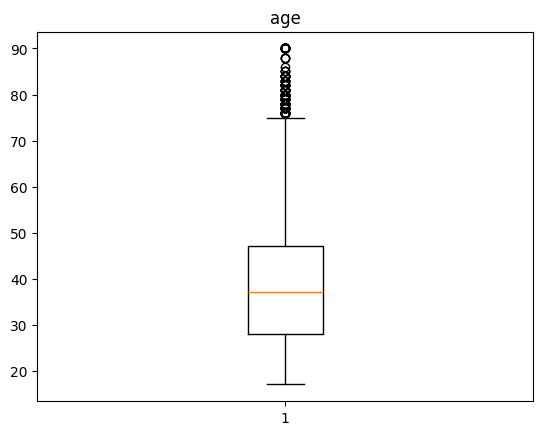

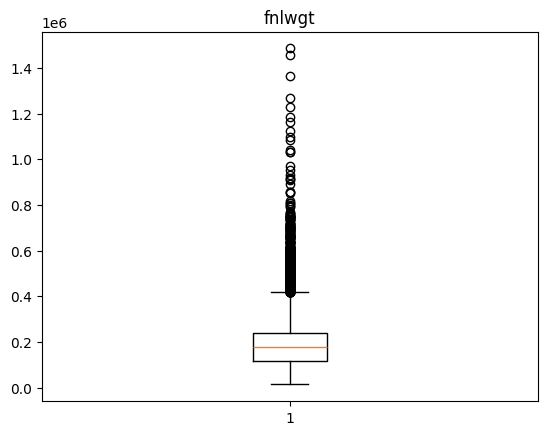

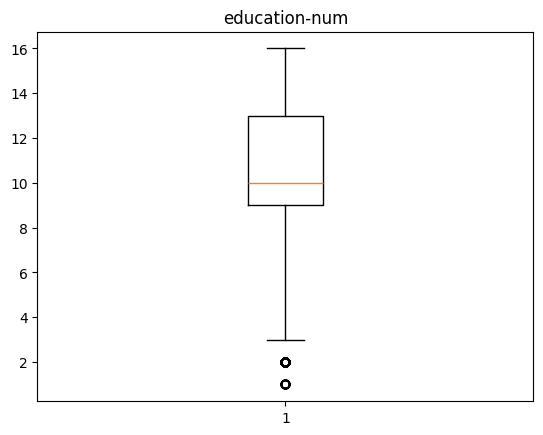

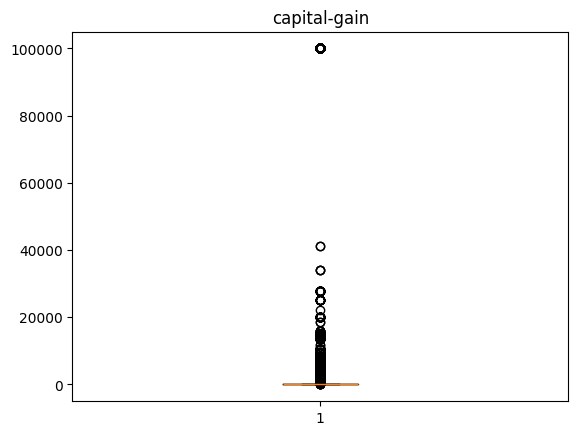

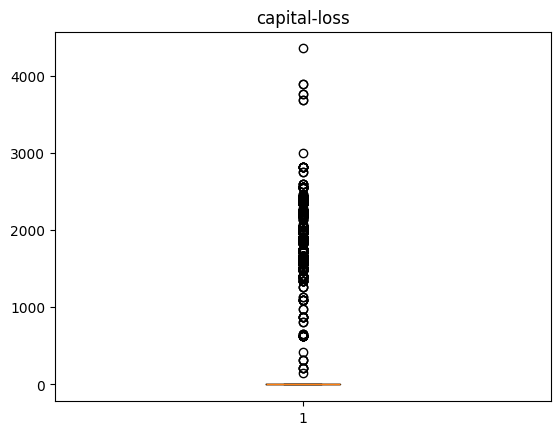

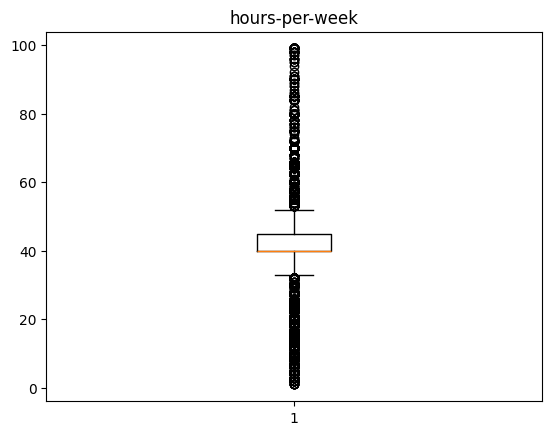

In [ ]:
for col in df.columns:
  if df[col].dtypes!="object":
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
out_cols = ["age","fnlwgt",'hours-per-week']

In [ ]:
for col in out_cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  IQR = q3-q1
  LL = q1 - 1.5*IQR
  UL = q3 + 1.5*IQR
  df = df[(df[col]<=UL) & (df[col]>=LL)]

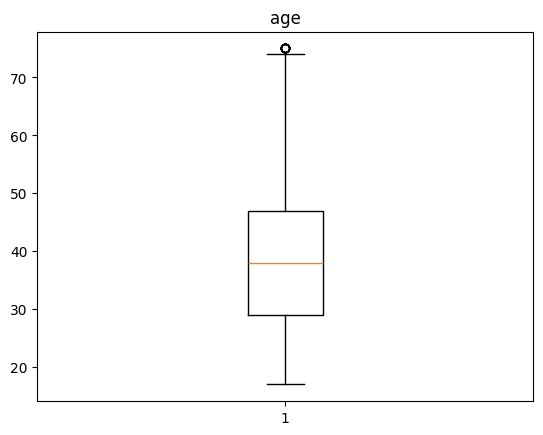

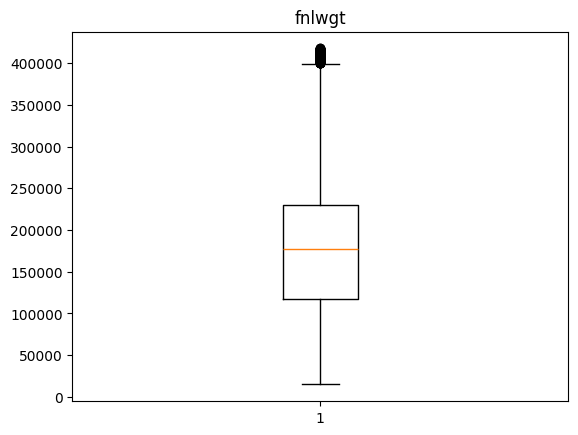

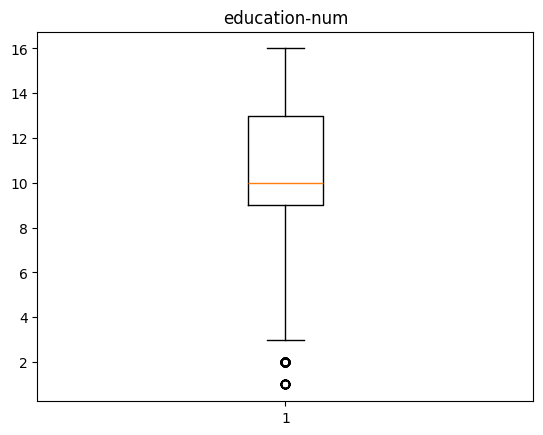

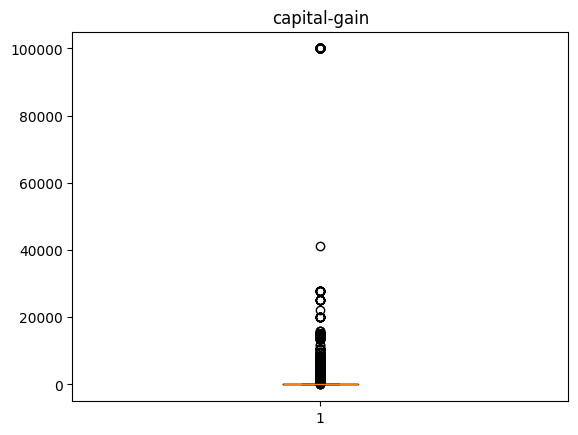

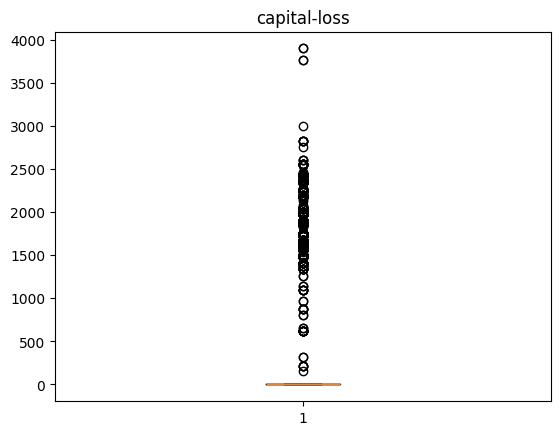

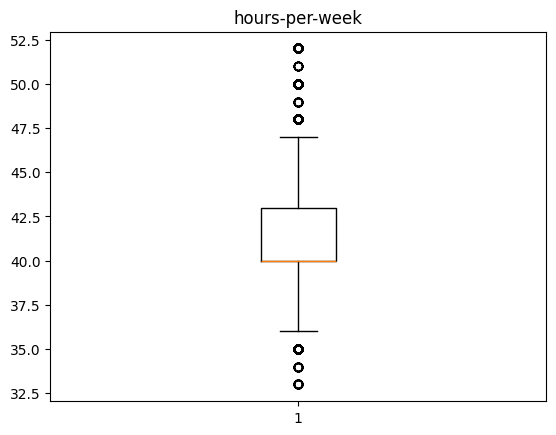

In [ ]:
for col in df.columns:
  if df[col].dtypes!="object":
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in df.columns:
  if df[col].dtypes=="object":
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [ ]:
y = df['annual_income']
x = df.drop('annual_income',axis=1)

In [ ]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,15,10,4,10,1,4,1,0,0,40,38
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38


In [ ]:
y

,annual_income
0,0
2,0
3,0
4,0
5,0
...,...
32555,0
32556,0
32557,1
32558,0


In [ ]:
df['annual_income'].value_counts()

,count
annual_income,
0,15823
1,5611


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.70,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = LogisticRegression()

In [ ]:
model1.fit(xtrain,ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import *

In [ ]:
result = pd.DataFrame()

In [ ]:
result["Actual"] = ytest
ypred = model1.predict(xtest)

In [ ]:
result["LogisticPred"] = ypred
result

,Actual,LogisticPred
20929,1,0
8199,0,0
1613,1,0
19122,0,0
24089,1,1
...,...,...
28172,1,1
25969,0,0
3806,1,0
29555,1,1


In [ ]:
print(accuracy_score(ytest,ypred))

0.7860363862540818


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2 = DecisionTreeClassifier()

In [ ]:
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
result["DicisionTreePredict"] = model2.predict(xtest)

In [ ]:
result

,Actual,LogisticPred,DicisionTreePredict
20929,1,0,1
8199,0,0,0
1613,1,0,0
19122,0,0,0
24089,1,1,1
...,...,...,...
28172,1,1,1
25969,0,0,0
3806,1,0,1
29555,1,1,1


In [ ]:
ypred2 = model2.predict(xtest)
accuracy_score(ytest,ypred2)

0.7911677810604882

**Implementing the boosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model3 = AdaBoostClassifier(n_estimators=100,random_state=42)

In [ ]:
model3.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
ypred3 = model3.predict(xtest)

In [ ]:
result["Adaboostpred"] = ypred3

In [ ]:
result

,Actual,LogisticPred,DicisionTreePredict,Adaboostpred
20929,1,0,1,0
8199,0,0,0,0
1613,1,0,0,0
19122,0,0,0,0
24089,1,1,1,1
...,...,...,...,...
28172,1,1,1,1
25969,0,0,0,0
3806,1,0,1,1
29555,1,1,1,1


In [ ]:
accuracy_score(ypred3,ytest)

0.8426372259368683

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model4 = GradientBoostingClassifier(n_estimators=100,random_state=42)

In [ ]:
model4.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=42)

In [ ]:
ypred4 = model4.predict(xtest)

In [ ]:
result["GradPredict"] = ypred4

In [ ]:
result

,Actual,LogisticPred,DicisionTreePredict,Adaboostpred,GradPredict
20929,1,0,1,0,1
8199,0,0,0,0,0
1613,1,0,0,0,0
19122,0,0,0,0,0
24089,1,1,1,1,1
...,...,...,...,...,...
28172,1,1,1,1,1
25969,0,0,0,0,0
3806,1,0,1,1,1
29555,1,1,1,1,1


In [ ]:
accuracy_score(ypred4,ytest)

0.8558544549836729

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#eta => learning rate
model5 = XGBClassifier(eta=0.12)

In [ ]:
model5.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.12, eval_metric=None,
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [ ]:
result["XGBOOstPred"] = model5.predict(xtest)

In [ ]:
result

,Actual,LogisticPred,DicisionTreePredict,Adaboostpred,GradPredict,XGBOOstPred
20929,1,0,1,0,1,1
8199,0,0,0,0,0,0
1613,1,0,0,0,0,0
19122,0,0,0,0,0,0
24089,1,1,1,1,1,1
...,...,...,...,...,...,...
28172,1,1,1,1,1,1
25969,0,0,0,0,0,0
3806,1,0,1,1,1,1
29555,1,1,1,1,1,1


In [ ]:
ypred5 = model5.predict(xtest)

In [ ]:
accuracy_score(ytest,ypred5)

0.8634737987871248